# Exercise 3  
**It is taken originally from 
" https://github.com/librosa/librosa/blob/master/examples/LibROSA%20demo.ipynb "**  


In [1]:
#We'll need numpy for some mathematical operations
import numpy as np

# matplotlib for displaying the output
import matplotlib.pyplot as plt
%matplotlib inline

# and IPython.display for audio output
import IPython.display as ipd
from sklearn import preprocessing
# Librosa for audio
import librosa
# And the display module for visualization
import librosa.display
import os
import pandas as pd

In [2]:
#example file
audio_path = librosa.util.example_audio_file()
y, sr = librosa.load(audio_path)

# Mel spectrogram

This first step will show how to compute a Mel spectrogram from an audio waveform.


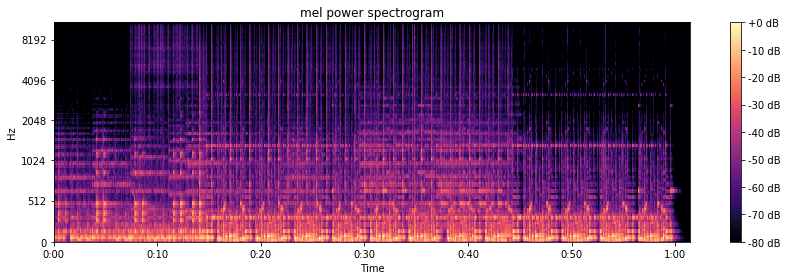

In [3]:
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()


# MFCC

Mel-frequency cepstral coefficients are commonly used to represent texture or timbre of sound.


In [4]:
audioPath = os.listdir("audioFiles") #returns a list of files under "audioFiles" directory
df = pd.DataFrame()

for i in audioPath:
    y, sr = librosa.load('audioFiles/' + i) #loads audio file from the given path
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).T #extracts transpoze of mfcc
    for m in mfcc:
        df = df.append(pd.Series(m), ignore_index=True) #appends dataframe row by row

In [5]:
df['Gender'] = "Female" #adds a column named "gender" to the dataframe
df.to_csv("data.csv") # write dataframe to a csv file

In [6]:
df = pd.read_csv("data.csv", encoding="utf-8") #read csv file into dataframe object
df = df.drop(columns="Unnamed: 0") #delete column named "Unnamed: 0" ?

In [7]:
ipd.Audio("audioFiles/output.mp3") #load a local audio file

In [8]:
df2 = pd.read_csv("dataframe.csv", encoding="utf-8") #read csv as dataframe
df2 = df2.drop(columns="Unnamed: 0") #drop weird(?) column

In [9]:
df = df.append(df2, ignore_index=True, sort=False) # concatanate two dataframe

In [10]:
df = df.sample(frac=1).reset_index(drop=True) #shuffle them

In [11]:
scaler = preprocessing.StandardScaler() # standard feature scaling
scaled_df = scaler.fit_transform(df[df.columns.values[:-1]])
scaled_df = pd.DataFrame(scaled_df)

In [12]:
df[df.columns.values[:-1]] = scaled_df

In [13]:
#df